# Elon Mask Tweets

In [1]:
import re
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
em=pd.read_csv("Elon_musk.csv",encoding='unicode_escape')
em

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# performing EDA

In [3]:
em.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [4]:
em.duplicated().sum()

0

In [5]:
em=em.drop(columns=('Unnamed: 0'),axis=1)

In [6]:
em

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# preprocessing

In [7]:
em.Text=em.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [8]:
em

,Text
0,kunalb Im an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...
...,...
1994,flcnhvy True it sounds so surreal but the nega...
1995,PPathole Make sure to read ur terms amp condit...
1996,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is UFUF


In [9]:
em.Text=em.Text.apply(lambda x: x.lower())

In [10]:
em

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is ufuf


# splitting the words from line

In [11]:
em.Text=em.Text.apply(lambda x: x.split())

In [12]:
em

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


# removing stop words

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
em.Test=em.Text.apply(lambda x:[word for word in x if word not in set(stopwords.words('english'))])

In [16]:
em

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


# stemming

In [17]:
ps=PorterStemmer()
em.Text=em.Text.apply(lambda x:[ps.stem(word) for word in x])

In [18]:
em

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, trace, on, cyberpunk, with,..."
2,"[joerogan, spotifi, great, interview]"
3,"[gtera, doge, is, underestim]"
4,"[teslacn, congratul, tesla, china, for, amaz, ..."
...,...
1994,"[flcnhvi, true, it, sound, so, surreal, but, t..."
1995,"[ppathol, make, sure, to, read, ur, term, amp,..."
1996,"[teslagong, ppathol, samwis, gamge]"
1997,"[ppathol, altho, dumb, and, dumber, is, ufuf]"


# rejoining

In [19]:
em.Text=em.Text.apply(lambda x: " ".join(x))

In [20]:
em

,Text
0,kunalb im an alien
1,idaacarmack ray trace on cyberpunk with hdr is...
2,joerogan spotifi great interview
3,gtera doge is underestim
4,teslacn congratul tesla china for amaz execut ...
...,...
1994,flcnhvi true it sound so surreal but the neg p...
1995,ppathol make sure to read ur term amp condit b...
1996,teslagong ppathol samwis gamge
1997,ppathol altho dumb and dumber is ufuf


In [21]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


# sentiment analysis

In [22]:
from textblob import TextBlob
em['sentiment']=em['Text'].apply(lambda x:TextBlob(x).sentiment[0])
em[['Text','sentiment']].head()

,Text,sentiment
0,kunalb im an alien,-0.250000
1,idaacarmack ray trace on cyberpunk with hdr is...,0.000000
2,joerogan spotifi great interview,0.800000
3,gtera doge is underestim,0.000000
4,teslacn congratul tesla china for amaz execut ...,0.166667


# problem statement_2

In [23]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as ply

In [24]:
link='https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [25]:
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [26]:
review_list

['INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles and Court judgments are in PDF( Legal documents use large font size and equal spacing, and lots of margin consuming only 10-12 lines in a page). It is better to convert them in mobi format online, and t

In [27]:
len(review_list)

40

In [28]:
rv=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth',800)
rv

,Reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ..."
1,"Compact, easy to use. Bought it a year or so back. This is my second Kindle. First one lasted more than six years. At 5.2k (when I bought it) it was a win-win. I think it has been discontinued now. This was the best one for students — a useful product at a manageable price."
2,"WORTH EVERY PENNY!For anyone who is avid reader, this is what you need. Even for someone who reads every now and then this is a good purchase.Talking about the device itself, the screen does look like an actual book, but the touch response could be better, at least that's what I felt. Everything else has already been mentioned by others."
3,The design is premium. You can read the book at any angle even in sunlight. Many customization available in inbuilt software. The real winner is the endless list of books available in kindle store. Whatever book you need name it..it’s there
4,"Swiping speed is slow , not like phones."
5,"I would first like to tell that I am a student of class 10th, I bought this 4 weeks ago.Why I bought this?I just wanted to build a new habit of reading, and I just made a target of reading atleast 1 book a week. I didn't want to use it to for my textbooks but wanted to see if it can handle it of not.Lets go on a detailed review.LOOK AND FEEL-The body is of plastic and has a kind of matt finish but it definitely not feel a premium gadget. It is easy to hold but some scratches at the back are visible. But thats not a problem as it still looks good. There are no scratches on the screen and I don't think there would be ever either.USER INTERFACE AND TOUCH-The overall interface is actually very bad if compared to a phone or tablet. But since it is not a replacement for tablet, but for books..."
6,"I was initially skeptical about resolution and size of the device. But then I was not going to spend a bomb on higher resolutions and bigger screen sizes as the source of reading is limited largely to Kindle store. And I wanted to first try if Kindle is for me not. If I am convinced, I may upgrade later.I compared the look of the screen with some of my books and it looks good. Paper quality and print quality of books vary widely ranging from glossy papers to recycled papers. I would say this device falls at range of acceptable level compared to books. So, the way it looks is fine with me.Coming to size, I did not find size of 6 inches problematic. This size is comfortable enough for reading. And the size is better than bigger sizes, for carrying it around, putting in pocket, and for si..."
7,"Good product.. buy only if you are a person who reads e-book and is trying to switch to a better device. A person who used to read paperback may not like it. The product is great, it really delivers all the features mentioned."
8,"Using it for last 3-4 months here is my opinion about it.#Pros1.screen- there is day night difference in usual LCDs,IPS and this e-ink technology n it looks n feels absolutely like paper in daytime outdoors or with external light indoors2. UI - user interface is good consider reading guide included with it, it is easy to navigate and u can also make seperate collections for different genres of book.3. Weight - its very lightweight

# preprocessing

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
ps=PorterStemmer()

In [32]:
# def rvpreprocess(x):
#     x=re.sub('[^a-zA-Z ]', "", x)
#     x=x.lower()
#     x=x.split()
#     x=[word for word in x if word not in set(stopwords.words('english'))]
#     x=[ps.stem(word) for word in x]
#     x=" ".join(x)
#     return x

In [33]:
def rvpreprocess(x):
         x=re.sub('[^a-zA-Z ]', "", x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [34]:
rv['Reviews']=rv['Reviews'].apply(rvpreprocess)

In [35]:
rv.head()

,Reviews
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindlei use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distractionswhatspp youtub etc high read internet connect devicesthi reader solv problem one go light hold hour distract free improv product xx best strain eye mean carri work amount time effect make product xxi law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text smallin boxkindl data cabl length decent qualitybuild qualiti plastic bodi matt finish wont fall hand display glass al...
1,compact easi use bought year back second kindl first one last six year k bought winwin think discontinu best one student use product manag price
2,worth everi pennyfor anyon avid reader need even someon read everi good purchasetalk devic screen look like actual book touch respons could better least that felt everyth els alreadi mention other
3,design premium read book angl even sunlight mani custom avail inbuilt softwar real winner endless list book avail kindl store whatev book need name itit
4,swipe speed slow like phone


In [36]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


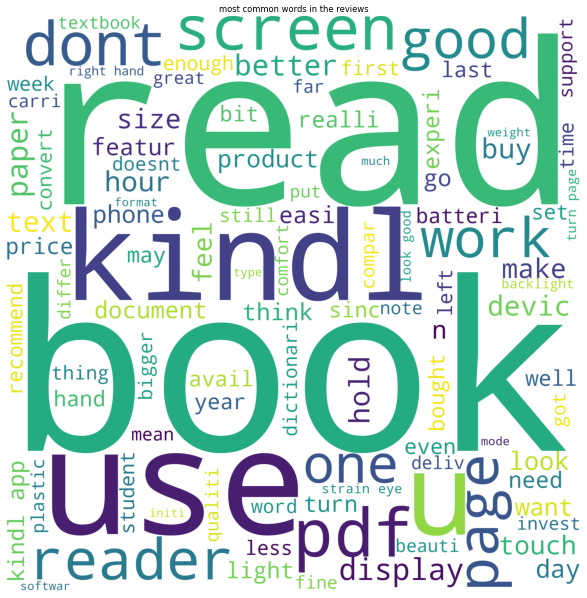

In [40]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordcloud=WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud=wordcloud.generate(' '.join(rv['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("most common words in the reviews")
plt.axis('off')
plt.show()

# sentiment analysis

In [41]:
from textblob import TextBlob
rv['sentiment_score']=rv['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
rv[['Reviews','sentiment_score']].head()

,Reviews,sentiment_score
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindlei use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distractionswhatspp youtub etc high read internet connect devicesthi reader solv problem one go light hold hour distract free improv product xx best strain eye mean carri work amount time effect make product xxi law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text smallin boxkindl data cabl length decent qualitybuild qualiti plastic bodi matt finish wont fall hand display glass al...,0.187102
1,compact easi use bought year back second kindl first one last six year k bought winwin think discontinu best one student use product manag price,0.250000
2,worth everi pennyfor anyon avid reader need even someon read everi good purchasetalk devic screen look like actual book touch respons could better least that felt everyth els alreadi mention other,0.189286
3,design premium read book angl even sunlight mani custom avail inbuilt softwar real winner endless list book avail kindl store whatev book need name itit,0.037500
4,swipe speed slow like phone,-0.300000


In [45]:
def sentiment_category(score1):
    if(score1 > 0.3):
        return 'Positive'
    elif(score1 < -0.2):
        return 'Negative'
    else:
        return 'Neutral'

In [46]:
rv['sentiment']=rv['sentiment_score'].apply(lambda x:sentiment_category(x))

In [47]:
rv.head()

,Reviews,sentiment_score,sentiment
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindlei use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distractionswhatspp youtub etc high read internet connect devicesthi reader solv problem one go light hold hour distract free improv product xx best strain eye mean carri work amount time effect make product xxi law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text smallin boxkindl data cabl length decent qualitybuild qualiti plastic bodi matt finish wont fall hand display glass al...,0.187102,Neutral
1,compact easi use bought year back second kindl first one last six year k bought winwin think discontinu best one student use product manag price,0.250000,Neutral
2,worth everi pennyfor anyon avid reader need even someon read everi good purchasetalk devic screen look like actual book touch respons could better least that felt everyth els alreadi mention other,0.189286,Neutral
3,design premium read book angl even sunlight mani custom avail inbuilt softwar real winner endless list book avail kindl store whatev book need name itit,0.037500,Neutral
4,swipe speed slow like phone,-0.300000,Negative


In [48]:
rv['sentiment'].value_counts()

Neutral     32
Positive     6
Negative     2
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

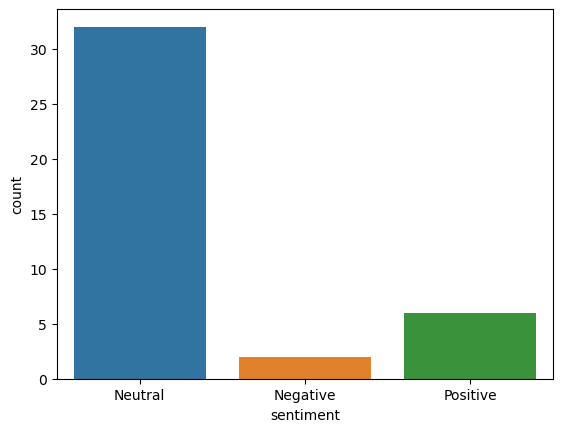

In [50]:
sns.countplot(x=rv['sentiment'])